# About this project

## the goal

To understand the landscape of cars sold on ebay by asking the following questions:
1. what brand is most popular (by nums of ads posted) during this time on ebay?
2. what's the top 10 most expensive/cheap car sold? Understand their information and seek potential patterns (print registration year, vehicle_type, price, brand, odometer_km, ad_created)
3. For buyers, find the top 10 most economical deals during this time. (the cars with lowest $dollar/mile, assuming each car can run up to 200,000 miles)

## the approach

## data source

The data is originally scraped and uploaded to [Kaggle](https://www.kaggle.com/orgesleka/used-cars-database/data). [DataQuest](https://app.dataquest.io/m/294/guided-project%3A-exploring-ebay-car-sales-data/1/introduction) made a few modifications from the original dataset that was uploaded to Kaggle:

    - sampled 50,000 data points from the full dataset
    - dirtied the dataset a bit to more closely resemble what you would expect from a scraped dataset (the version uploaded to Kaggle was cleaned to be easier to work with)



# Data importing & cleaning

In [1]:
# import data
import pandas as pd
import numpy as np

autos = pd.read_csv('autos.csv',encoding="Latin-1")
#print(autos)

# a basic understanding of our dataset
autos.info()
autos.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
dateCrawled            50000 non-null object
name                   50000 non-null object
seller                 50000 non-null object
offerType              50000 non-null object
price                  50000 non-null object
abtest                 50000 non-null object
vehicleType            44905 non-null object
yearOfRegistration     50000 non-null int64
gearbox                47320 non-null object
powerPS                50000 non-null int64
model                  47242 non-null object
odometer               50000 non-null object
monthOfRegistration    50000 non-null int64
fuelType               45518 non-null object
brand                  50000 non-null object
notRepairedDamage      40171 non-null object
dateCreated            50000 non-null object
nrOfPictures           50000 non-null int64
postalCode             50000 non-null int64
lastSeen               50000 non-null obj

,yearOfRegistration,powerPS,monthOfRegistration,nrOfPictures,postalCode
count,50000.000000,50000.000000,50000.000000,50000.0,50000.000000
mean,2005.073280,116.355920,5.723360,0.0,50813.627300
std,105.712813,209.216627,3.711984,0.0,25779.747957
min,1000.000000,0.000000,0.000000,0.0,1067.000000
25%,1999.000000,70.000000,3.000000,0.0,30451.000000
50%,2003.000000,105.000000,6.000000,0.0,49577.000000
75%,2008.000000,150.000000,9.000000,0.0,71540.000000
max,9999.000000,17700.000000,12.000000,0.0,99998.000000


### Observations:

1. columns with null values include: `vehicleType`,`gearbox`,`model`,`fuelType`and `notRepairedDamage`
2. problematic data include: 
-`yearOfRegistration`- minimum is 1000, which is not possible;
-`monthOfRegistration`-minimum is 0, not within 1-12
3. `price` and `odometer` column should also be converted to a float datatype.
4. The column names use camelcase instead of Python's preferred snakecase, which means we can't just replace spaces with underscores.


In [2]:
# cleanup step 1: 
# convert the column names from camelcase to snakecase and 
# reword some of the column names based on the data dictionary to be more descriptive

autos.columns

modified_column_list = ['date_crawled', 'name', 'seller', 'offer_type', 'price', 'abtest',
       'vehicle_type', 'registration_year', 'gearbox', 'powerPS', 'model',
       'odometer', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'nr_of_pictures', 'postal_code',
       'last_seen']

autos.columns = modified_column_list

In [3]:
# cleanup step 2: convert price and odemeter columns to float, and rename the columns for clarity


autos["price"] = autos["price"].str.replace("$","").str.replace(",","").astype(int)
autos["odometer"] = autos["odometer"].str.replace("km","").str.replace(",","").astype(int)




In [4]:
# cleanup step 3: remove unusual data
autos.describe(include="all")

#yearOfRegistration
autos["registration_year"].unique()
# remove data thats not between [1885,2020] (the first car was made in 1885)
autos.loc[(autos["registration_year"]<1885)|(autos["registration_year"]>2020),"registration_year"] = "year unknown"
autos.drop(autos[autos["registration_year"]=="year unknown"].index,inplace=True)

# check the clean data again
autos["registration_year"].value_counts()


2000    3354
2005    3015
1999    3000
2004    2737
2003    2727
        ... 
1939       1
1938       1
1931       1
1929       1
1927       1
Name: registration_year, Length: 81, dtype: int64

In [5]:
# monthOfRegistration

autos["registration_month"].value_counts()

# drop the rows with month "0"
autos.drop(autos[autos["registration_month"]==0].index, inplace=True)

autos["registration_month"].value_counts()

3     5070
6     4367
5     4107
4     4102
7     3947
10    3651
12    3446
9     3389
11    3359
1     3282
8     3191
2     3005
Name: registration_month, dtype: int64

In [6]:
# price column

autos["price"].unique().shape
autos["price"].describe()
autos["price"].value_counts()

# remove all the "o" price rows
autos.drop(autos[autos["price"]==0].index,inplace=True)

autos["price"].value_counts()

1500     633
500      630
2500     569
1200     543
1000     513
        ... 
2651       1
4335       1
22790      1
269        1
5485       1
Name: price, Length: 2316, dtype: int64

In [7]:
# rename the columns: 

autos.rename({"price":"price_$"},axis=1, inplace=True)
autos.rename({"odometer":"odometer_km"},axis=1, inplace=True)

autos.columns



Index(['date_crawled', 'name', 'seller', 'offer_type', 'price_$', 'abtest',
       'vehicle_type', 'registration_year', 'gearbox', 'powerPS', 'model',
       'odometer_km', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'nr_of_pictures', 'postal_code',
       'last_seen'],
      dtype='object')

In [8]:
# cleanup step 4: date_crawled, last_seen, and ad_created columns: convert value from str to num
autos[["date_crawled","last_seen","ad_created"]][:5]

# understand the distribution
autos["date_crawled"].str[:10].value_counts(normalize=True,dropna=False)
autos["ad_created"].str[:10].value_counts(normalize=True,dropna=False)
autos["ad_created"].str[:10].sort_index(ascending=False)


49999    2016-03-13
49998    2016-03-08
49997    2016-04-02
49996    2016-03-28
49995    2016-03-27
            ...    
4        2016-04-01
3        2016-03-12
2        2016-03-26
1        2016-04-04
0        2016-03-26
Name: ad_created, Length: 44089, dtype: object

# question 1: what brand is most popular (by nums of ads posted) during this time on ebay? what model?

`brand`, `name`

In [9]:
autos.head()

,date_crawled,name,seller,offer_type,price_$,abtest,vehicle_type,registration_year,gearbox,powerPS,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,5000,control,bus,2004,manuell,158,andere,150000,3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,8500,control,limousine,1997,automatik,286,7er,150000,6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,8990,test,limousine,2009,manuell,102,golf,70000,7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,4350,control,kleinwagen,2007,automatik,71,fortwo,70000,6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,1350,test,kombi,2003,manuell,0,focus,150000,7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [10]:
autos["brand"].value_counts()

volkswagen        9240
bmw               4896
opel              4620
mercedes_benz     4357
audi              3852
ford              3032
renault           2073
peugeot           1305
fiat              1131
seat               836
skoda              741
nissan             687
mazda              656
smart              641
citroen            617
toyota             579
hyundai            450
volvo              407
sonstige_autos     406
mini               405
mitsubishi         353
honda              351
kia                333
alfa_romeo         290
porsche            274
suzuki             263
chevrolet          252
chrysler           152
dacia              121
daihatsu           103
jeep               102
land_rover          93
subaru              87
saab                75
daewoo              69
jaguar              68
rover               58
lancia              47
trabant             43
lada                24
Name: brand, dtype: int64

### Top 5 popular brand sold on Ebay:

volkswagen        9240

bmw               4896

opel              4620

mercedes_benz     4357

audi              3852



In [11]:
# the most popular model in each top 5 brand:
autos.loc[autos["brand"]=="volkswagen","model"].value_counts() #golf
autos.loc[autos["brand"]=="bmw","model"].value_counts() #3er
autos.loc[autos["brand"]=="opel","model"].value_counts() #corsa
autos.loc[autos["brand"]=="mercedes_benz","model"].value_counts() #c_klasse
autos.loc[autos["brand"]=="audi","model"].value_counts() #a4

a4        1159
a3         811
a6         768
andere     213
80         167
tt         138
a5         127
a1          84
a8          68
q5          62
100         49
a2          43
q7          42
q3          28
90           6
200          1
Name: model, dtype: int64

## question 1 summary: 

### The top five brand sold (and the most popular model) on Ebay was: 
1. volkswagen -golf
2. bmw - 3er
3. opel - corsa
4. mercedes benz - c_klasse
5. audi -a4

# question 2: analyze the a/b test ad result


In [12]:
autos["abtest"].unique()


# see how many ads are being tested
autos["abtest"].value_counts()



test       22700
control    21389
Name: abtest, dtype: int64

### there are only two a/b testing groups (test and control) in our dataset, and the percentage of test/control group is around 50/50 - therefore the a/b test dataset is reliable.

Next, we'll see how a/b test impact how fast the car is sold (last_seen - first_crawled)


In [13]:

# figure out the lastest crawling day in the database:
autos["date_crawled"].str[:10].unique().max()

# filter out only "sold car" data
sold_car_filter = autos["last_seen"].str[:10]!= "2016-04-07"
sold_car_table = autos.loc[sold_car_filter]
#print(sold_car_table)


### the latest day the data is crawled is 2016-04-07, so:
- if the ad is still seen on this day, we'll consider the car as "not sold";
- if the ad is seen before this day, which means it is removed already, we'll consider the car as "sold"

We've filtered out the sold car data and next, we'll convert `date crawled` and `last seen` to datetime object, and calcuate the timedelta to add new column: `sold_in_days`


In [65]:
import datetime as dt
import pandas as pd

# because we only care about the date of the ad crawling, we'll remove the time data in the two columns 
# and convert the two columns into datetime object
autos["date_crawled"] = pd.to_datetime(autos["date_crawled"].str[:10])
autos["last_seen"] = pd.to_datetime(autos["last_seen"].str[:10])



In [85]:
#autos.info()

# new column
autos["sold_in_days"] = autos["last_seen"] - autos["date_crawled"]
autos.head()

autos["sold_in_days"].value_counts()

0 days     6267
2 days     4641
4 days     3338
6 days     2491
1 days     2402
3 days     2160
8 days     2045
9 days     1618
11 days    1500
7 days     1486
5 days     1460
10 days    1183
13 days    1123
12 days    1073
14 days    1011
15 days     970
18 days     966
16 days     846
17 days     809
22 days     742
21 days     681
24 days     563
23 days     532
19 days     511
29 days     488
27 days     487
26 days     477
20 days     473
25 days     427
31 days     399
28 days     386
30 days     310
33 days     130
32 days      94
Name: sold_in_days, dtype: int64

In [88]:
# mean of control/test group 
autos.loc[(autos["abtest"]=="test")&~(autos["sold_in_days"]==0),"sold_in_days"].mean()


Timedelta('8 days 21:59:47.312775')

In [89]:
autos.loc[(autos["abtest"]=="control")&~(autos["sold_in_days"]==0),"sold_in_days"].mean()

Timedelta('8 days 18:27:29.109355')

## question 2 summary: 

there is no significant difference between the time a car is getting sold from the impact of a/b testing.

## Question 3: How much cheaper are cars with damage than their non-damaged counterparts?

In [15]:
autos.head()

,date_crawled,name,seller,offer_type,price_$,abtest,vehicle_type,registration_year,gearbox,powerPS,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
0,2016-03-26,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,5000,control,bus,2004,manuell,158,andere,150000,3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06
1,2016-04-04,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,8500,control,limousine,1997,automatik,286,7er,150000,6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06
2,2016-03-26,Volkswagen_Golf_1.6_United,privat,Angebot,8990,test,limousine,2009,manuell,102,golf,70000,7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06
3,2016-03-12,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,4350,control,kleinwagen,2007,automatik,71,fortwo,70000,6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15
4,2016-04-01,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,1350,test,kombi,2003,manuell,0,focus,150000,7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01


In [36]:
# `unrepaired_damage` & `price_$`, controlled by `brand`
# check unique values in `unrepaired_damage`
autos["unrepaired_damage"].value_counts()
autos.loc[autos["unrepaired_damage"]=="ja"]
autos.loc[autos["unrepaired_damage"]=="ja","price_$"].mean()


2634.4069539666993

In [46]:
autos.loc[(autos["unrepaired_damage"]=="ja")&(autos["brand"]=="bmw")]["price_$"].mean()

3772.7602179836513

In [50]:
allBrands= autos["brand"].unique()
price_comparison = {} # { price diff :brand name} (for each brand, mean nein - mean ja)

def calPriceDiff(brandName):
    jaMean = autos.loc[(autos["unrepaired_damage"]=="ja")&(autos["brand"]==brandName)]["price_$"].mean()
    neinMean = autos.loc[(autos["unrepaired_damage"]=="nein")&(autos["brand"]==brandName)]["price_$"].mean()
    return neinMean - jaMean

for brand in allBrands: 
    price_comparison[brand] = calPriceDiff(brand)

price_comparison

{'peugeot': 2204.0905258727344,
 'bmw': 5740.96566256765,
 'volkswagen': 2883.2737000861825,
 'smart': 2462.6157928046346,
 'ford': 8904.26399789904,
 'chrysler': 1774.9727272727273,
 'seat': 3412.064716546436,
 'renault': 1884.7014573945519,
 'audi': 7460.713814518054,
 'sonstige_autos': 59867.76634408603,
 'opel': 5962.061841403228,
 'mazda': 3717.048232848233,
 'porsche': 36455.256097560974,
 'mini': 6543.88948787062,
 'mercedes_benz': 5747.573146471577,
 'toyota': 2084.91743697479,
 'dacia': 1757.791666666667,
 'nissan': 3770.6590446152836,
 'jeep': 9462.720238095239,
 'saab': 3348.6336206896553,
 'volvo': 42978.07057188825,
 'mitsubishi': 2806.7755244755244,
 'jaguar': 9124.732142857143,
 'fiat': 2269.8045917187137,
 'skoda': 3559.498809937026,
 'subaru': 2594.2566585956415,
 'kia': 4893.103361344538,
 'citroen': 2313.758779631256,
 'chevrolet': 4001.758491652274,
 'hyundai': 3399.700992110925,
 'honda': 3456.5464429947187,
 'daewoo': 657.6565217391305,
 'suzuki': 3437.32701421800

## question 3 summary: 

####  The dictionary above showed how much cheaper the damaged car cost on ebay compared to their counterparts. 

#### The top 3 car model with the biggest price difference are: 
1. sonstige_autos
2. volvo
3. porsche

#### The top 3 car model with the least price difference are:
1. lancia - with negative difference
2. rover
3. lada

##  Question 4: Split the odometer_km into groups, and use aggregation to see if average prices follows any patterns based on the milage.

In [62]:
# understand the range of `odometer_km`
odometer_unique = autos["odometer_km"].unique()

# avg price for each odometer group
def avg_price_odometer(car_odometer):
    return autos.loc[autos["odometer_km"]==car_odometer,"price_$"].mean()

price_by_odometer = {}
for odometer in odometer_unique:
    price_by_odometer[odometer] = avg_price_odometer(odometer)
    
price_by_odometer

# to a linear regression chart to demonstrate

{150000: 8489.035375846099,
 70000: 11173.007751937985,
 50000: 26763.701232032854,
 80000: 9853.878497790869,
 10000: 21841.28,
 30000: 16896.993368700267,
 125000: 6540.04777941486,
 90000: 8646.94890510949,
 20000: 18792.94368131868,
 60000: 12528.10242587601,
 5000: 18530.27504553734,
 40000: 49920.103274559195,
 100000: 13411.388211382115}

In [61]:
autos.head()
# autos.iloc[0]


18530.27504553734

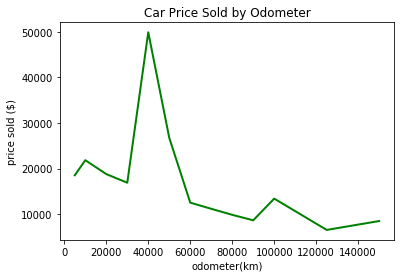

In [106]:
# display by line chart
import matplotlib.pyplot as plt


x = [5000,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000,125000,150000]
y = [18530.27504553730,21841.28,18792.94368131870,16896.993368700300,49920.103274559200,26763.701232032900,12528.10242587600,11173.007751938000,9853.878497790870,8646.94890510949,13411.388211382100,6540.04777941486,8489.035375846100]
plt.plot(x,y,color="green",linewidth=2,markersize=30)
plt.xlabel("odometer(km)")
plt.ylabel("price sold ($)")
plt.title("Car Price Sold by Odometer")
plt.show()